In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

sb.set()

In [27]:
#Extract the cleaned dataset for data preprocessing
df = pd.read_csv("1-cleaned-heart-disease-dataset.csv")

# Encoding of categorical variables using OneHotEncoding
#### This allows for our classification model from sklearn to handle them directly

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# extract out the categorical variables for one hot encoding, except the response
df_cat = df[['AGECATEGORY','RACE','SEX','SMOKING', 'ALCOHOLDRINKING', 'STROKE', 'DIFFWALKING', 'DIABETIC','PHYSICALACTIVITY', 'GENHEALTH', 'ASTHMA', 'KIDNEYDISEASE', 'SKINCANCER']]

#onehotencoding
ohe.fit(df_cat)

#create the new one hot categorical variables dataframe
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), columns = ohe.get_feature_names(df_cat.columns))

# Reformat the column names cleaner again
df_cat_ohe.columns = df_cat_ohe.columns.str.replace(" ", "_")
df_cat_ohe.columns = df_cat_ohe.columns.str.replace("-", "_")
df_cat_ohe.columns = df_cat_ohe.columns.str.upper()
df_cat_ohe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   AGECATEGORY_18_24                    319795 non-null  float64
 1   AGECATEGORY_25_29                    319795 non-null  float64
 2   AGECATEGORY_30_34                    319795 non-null  float64
 3   AGECATEGORY_35_39                    319795 non-null  float64
 4   AGECATEGORY_40_44                    319795 non-null  float64
 5   AGECATEGORY_45_49                    319795 non-null  float64
 6   AGECATEGORY_50_54                    319795 non-null  float64
 7   AGECATEGORY_55_59                    319795 non-null  float64
 8   AGECATEGORY_60_64                    319795 non-null  float64
 9   AGECATEGORY_65_69                    319795 non-null  float64
 10  AGECATEGORY_70_74                    319795 non-null  float64
 11  AGECATEGORY_7

In [29]:
# Combining Numeric vairiables, OHE categorical variables and the response variables into the final data frame to be used
df_num = df[['BMI', 'PHYSICALHEALTH', 'MENTALHEALTH', 'SLEEPTIME']]
df_responseVar = df['HEARTDISEASE']
df_final = pd.concat([df_num, df_cat_ohe, df_responseVar], 
                           sort = False, axis = 1).reindex(df_num.index)
df_final

,BMI,PHYSICALHEALTH,MENTALHEALTH,SLEEPTIME,AGECATEGORY_18_24,AGECATEGORY_25_29,AGECATEGORY_30_34,AGECATEGORY_35_39,AGECATEGORY_40_44,AGECATEGORY_45_49,...,GENHEALTH_GOOD,GENHEALTH_POOR,GENHEALTH_VERY_GOOD,ASTHMA_NO,ASTHMA_YES,KIDNEYDISEASE_NO,KIDNEYDISEASE_YES,SKINCANCER_NO,SKINCANCER_YES,HEARTDISEASE
0,16.60,3.0,30.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,No
1,20.34,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,No
2,26.58,20.0,30.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,No
3,24.21,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No
4,23.71,28.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Yes
319791,29.84,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,No
319792,24.24,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
319793,32.81,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No


## Evidence of poor results without resampling below

##### Visualise the severe Imbalance in the categorical response variable - "HeartDiseas"

(27373, 49)

(292422, 49)

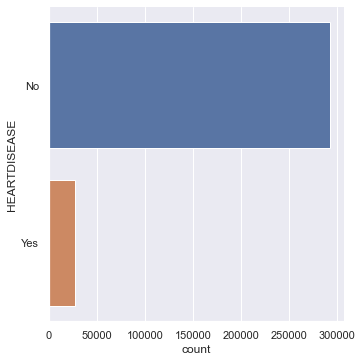

In [30]:
# Clear imbalance of classes, "No" for "HEARTDISEASE" far more than "Yes" for "HEARTDISEASE"
display(df_final[df_final.HEARTDISEASE == 'Yes'].shape)
display(df_final[df_final.HEARTDISEASE == 'No'].shape)

# visual representation of the imbalances
sb.catplot(y = "HEARTDISEASE", data = df_final, kind = "count")

##### Machine Learning, creation of classification tree

##### High false negative rates (Extremely low prediction accuracy)

In [31]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

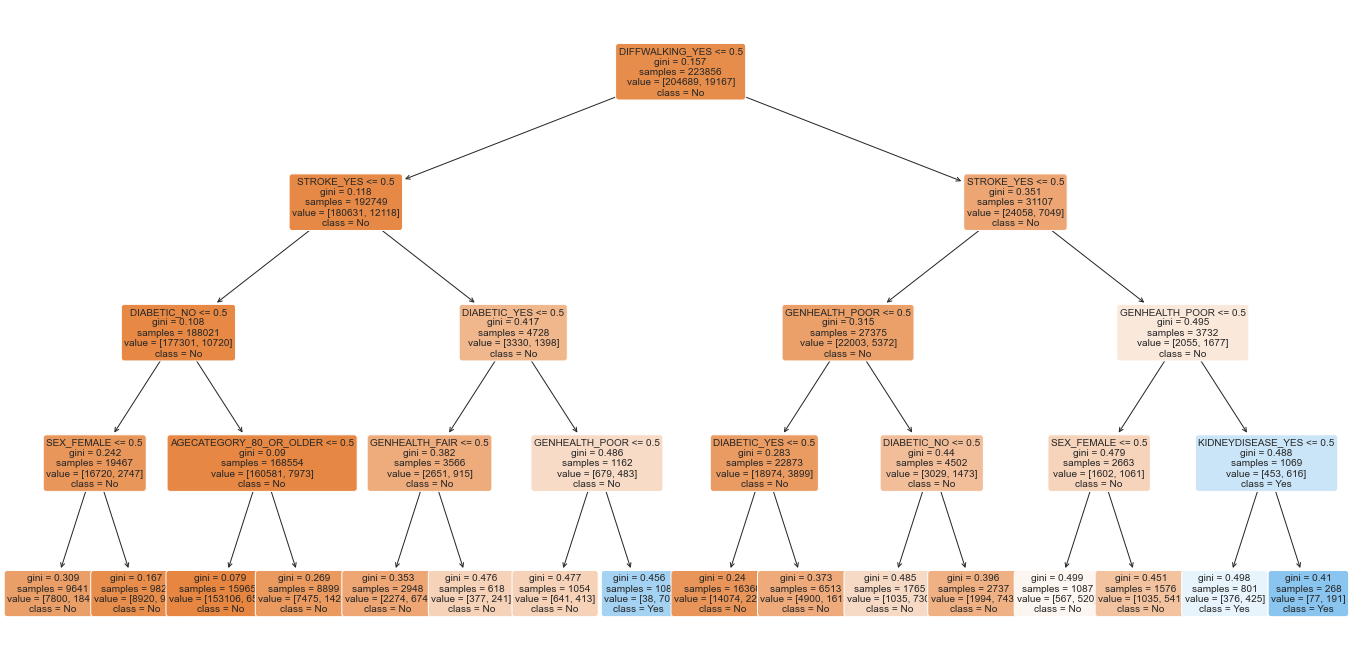

In [32]:
# Extract Response and Predictors
y = pd.DataFrame(df_final['HEARTDISEASE'])
X = pd.DataFrame(df_final.drop('HEARTDISEASE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"], fontsize = 10)

plt.show()

In [33]:
### Analysis of first decision tree classification model

Train Data
Accuracy  :	 0.9152490886998785

TPR Train :	 0.035790681901184326
TNR Train :	 0.9976012389527528

FPR Train :	 0.0023987610472472874
FNR Train :	 0.9642093180988157


<AxesSubplot:>

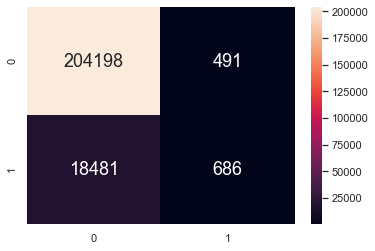

In [34]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] # False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] # True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9147687593158152

TPR Test :	 0.03387765049963441
TNR Test :	 0.9971618433200734

FPR Test :	 0.0028381566799265956
FNR Test :	 0.9661223495003656


<AxesSubplot:>

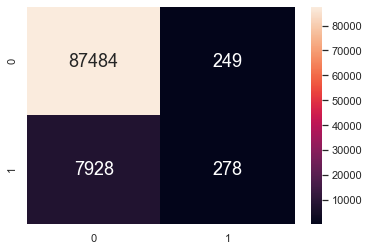

In [35]:
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTest = cmTest[0][1] # False Positives : No (0) predicted Yes (1)
tnTest = cmTest[0][0] # True Negatives : No (0) predicted No (0)
fnTest = cmTest[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Findings: 

#### Very bad model, insanely high false negative rate of 96.9% !
#### This will result in catastrophic consequences if the chances of misdiagnosing someone with heart disease as someone without heart disease. 

### Reason:

#### Classification algorithms will tend to have a low prediction accuracy toward the minority class because they assume that there is a balance between the classes.

#### Conclusion: Perform Resampling to balance the imbalance in classes of the response "HeartDisease" before machine learning for better prediction accuracy (Lower False Negative Rate)

# Resampling

In [36]:
# Trying both upsampling and downsampling:

# Import the essential function from sklearn
from sklearn.utils import resample

# extract the different classes
hd_yes = df_final[df_final.HEARTDISEASE == 'Yes']
hd_no = df_final[df_final.HEARTDISEASE == 'No']
 
# Upsample the "Yes" samples to match the "No" samples
hd_yes_up = resample(hd_yes, 
                        replace=True,                     # sample with replacement
                        n_samples=hd_no.shape[0])    # to match number of "No"

# Downsample the "No" samples to match the "Up" samples
hd_no_down = resample(hd_no, 
                        replace=True,                     # sample with replacement
                        n_samples=hd_yes.shape[0])    # to match number of "Yes"
 
# Combine the two classes back after upsampling
df_final_up = pd.concat([hd_no, hd_yes_up])

# Combine the two classes back after downsampling
df_final_down = pd.concat([hd_yes, hd_no_down])

##### Downsampled dataset

In [37]:
# Final check on the downsampled dataframe to make sure everything is in place (OHE is still fine)
df_final_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 5 to 305270
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  54746 non-null  float64
 1   PHYSICALHEALTH                       54746 non-null  float64
 2   MENTALHEALTH                         54746 non-null  float64
 3   SLEEPTIME                            54746 non-null  float64
 4   AGECATEGORY_18_24                    54746 non-null  float64
 5   AGECATEGORY_25_29                    54746 non-null  float64
 6   AGECATEGORY_30_34                    54746 non-null  float64
 7   AGECATEGORY_35_39                    54746 non-null  float64
 8   AGECATEGORY_40_44                    54746 non-null  float64
 9   AGECATEGORY_45_49                    54746 non-null  float64
 10  AGECATEGORY_50_54                    54746 non-null  float64
 11  AGECATEGORY_55_59          

Yes    27373
No     27373
Name: HEARTDISEASE, dtype: int64

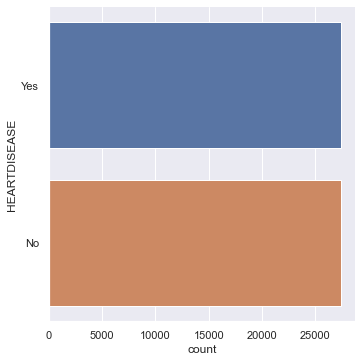

In [38]:
# Check the ratio of the classes for the downsampled dataframe
display(df_final_down['HEARTDISEASE'].value_counts())
sb.catplot(y='HEARTDISEASE', data = df_final_down, kind = "count")

##### Upsampled dataset

In [39]:
# Final check on the upsampled dataframe to make sure everything is in place (OHE is still fine)
df_final_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584844 entries, 0 to 288726
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  584844 non-null  float64
 1   PHYSICALHEALTH                       584844 non-null  float64
 2   MENTALHEALTH                         584844 non-null  float64
 3   SLEEPTIME                            584844 non-null  float64
 4   AGECATEGORY_18_24                    584844 non-null  float64
 5   AGECATEGORY_25_29                    584844 non-null  float64
 6   AGECATEGORY_30_34                    584844 non-null  float64
 7   AGECATEGORY_35_39                    584844 non-null  float64
 8   AGECATEGORY_40_44                    584844 non-null  float64
 9   AGECATEGORY_45_49                    584844 non-null  float64
 10  AGECATEGORY_50_54                    584844 non-null  float64
 11  AGECATEGORY_5

Yes    292422
No     292422
Name: HEARTDISEASE, dtype: int64

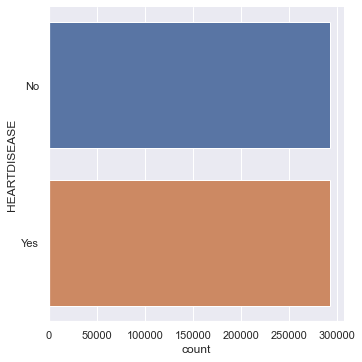

In [40]:
# Check the ratio of the classes for the upsampled dataframe
display(df_final_up['HEARTDISEASE'].value_counts())
sb.catplot(y='HEARTDISEASE', data = df_final_up, kind = "count")